#Bayesian lab Assignment-1

0. importing libraries
1. [Getting the data ready](#1)
    * making splitData
2. [Choosing the right maching learning model for our problem](#2)
3. [Fitting our chosen machine learning model to data and using it to make a prediction](#3)
4. [Evaluting a machine learning model](#4)
    * making calculate_accuracy function
5. [Making Decision Boundaries for Gaussian Naive Bayes on ires dataset](#5)

In [4]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

## 1. Getting the data ready <a name="1"></a>
* importing the data
* splitting the data using our splitData
* splitting it using sklearn split function


In [5]:
names = [ 'sepal_length', 'sepal_width' ,'petal_length' ,'petal_width' ,'target' ]
ires = pd.read_csv("/iris.data",header=None,names=names)
ires.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
target_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
ires['target'] = ires['target'].map(target_mapping)
ires.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = ires.drop('target',axis=1)
y = ires['target']


In [8]:
def splitData(data,labels,trainRatio=0.75, testRatio=0.25):
    testRatio = 1 - trainRatio
    m = data.shape[0]
    m_train = int(m * trainRatio)
    m_test = m - m_train
    split = np.random.choice(np.arange(m),size=m_test, replace=False)
    X_test = pd.DataFrame(data.iloc[split],columns = data.columns)
    X_train = pd.DataFrame(data.drop(split),columns=data.columns)
    y_test = pd.Series(labels.iloc[split],name = labels.name)
    y_train = pd.Series(labels.drop(split),name = labels.name)


    return(X_train,X_test,y_train,y_test)

In [9]:
X_train,X_test,y_train,y_test = splitData(X,y)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [10]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
132,6.4,2.8,5.6,2.2
121,5.6,2.8,4.9,2.0
54,6.5,2.8,4.6,1.5
44,5.1,3.8,1.9,0.4
11,4.8,3.4,1.6,0.2


In [11]:
from sklearn.model_selection import train_test_split

X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y, test_size=0.25)

X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape
X_train2.head()


,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
88,5.6,3.0,4.1,1.3
85,6.0,3.4,4.5,1.6
79,5.7,2.6,3.5,1.0
138,6.0,3.0,4.8,1.8


In [12]:
X_test2.head()

,sepal_length,sepal_width,petal_length,petal_width
134,6.1,2.6,5.6,1.4
51,6.4,3.2,4.5,1.5
75,6.6,3.0,4.4,1.4
86,6.7,3.1,4.7,1.5
31,5.4,3.4,1.5,0.4


##2. Choosing the right maching learning model for our problem <a name="2"></a>

In [13]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()

##3. Fitting our chosen machine learning model to data and using it to make a prediction <a name="3"></a>

In [14]:
cls.fit(X_train,y_train)

GaussianNB()

In [15]:
y_pred = cls.predict(X_test)
y_train_pred = cls.predict(X_train)

##4. Evaluting a machine learning model <a name="4"></a>
* using our calculate_accuracy function
* using cross_validation optimization


In [16]:
def calculate_accuracy(predicted_y , y):
  predicted_y = np.array(predicted_y)
  y = np.array(y)
  eqaul_y = np.array(predicted_y == y)
  return np.sum(eqaul_y)/y.shape[0]

In [17]:
print("Accuracy for training set")
calculate_accuracy(y_train_pred,y_train)

Accuracy for training set


0.9732142857142857

In [18]:
print("Accuracy for test set")
calculate_accuracy(y_pred,y_test)

Accuracy for test set


0.9473684210526315

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_mean = np.mean(cross_val_score(cls, X, y, cv=4))
print(f"4-fold cross-validation score: {cross_val_mean}")


4-fold cross-validation score: 0.9534139402560455


##5. Making Decision Boundaries for Gaussian Naive Bayes on ires dataset <a name="5"></a>

In [20]:
cls2 = GaussianNB()
cls2.fit(X.iloc[:,2:4],y)

GaussianNB()

In [21]:
x_min, x_max = X.iloc[:,2].min() - 1 , X.iloc[:,2].max() + 1
y_min, y_max = X.iloc[:,3].min() - 1 , X.iloc[:,3].max() + 1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                    np.arange(y_min, y_max, 0.01))

In [22]:
y_pred = cls2.predict(np.c_[xx.ravel(),yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


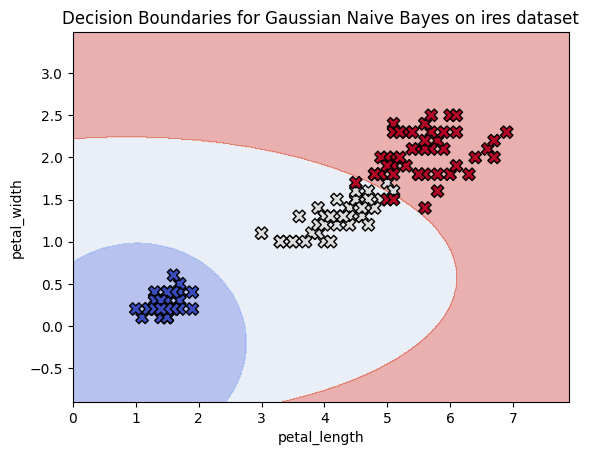

In [23]:
plt.contourf(xx,yy,y_pred,cmap=plt.cm.coolwarm,alpha=0.4)
plt.scatter(X.iloc[:,2],X.iloc[:,3],c=y,cmap=plt.cm.coolwarm,marker='X',edgecolors='k',s=80)
plt.xlabel(X.columns[2])
plt.ylabel(X.columns[3])
plt.title("Decision Boundaries for Gaussian Naive Bayes on ires dataset")
plt.show()

###for explanation

In [24]:
x_min, x_max = X.iloc[:,2].min() - 1 , X.iloc[:,2].max() + 1
y_min, y_max = X.iloc[:,3].min() - 1 , X.iloc[:,3].max() + 1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 1),
                    np.arange(y_min, y_max, 1))

y_pred = cls2.predict(np.c_[xx.ravel(),yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


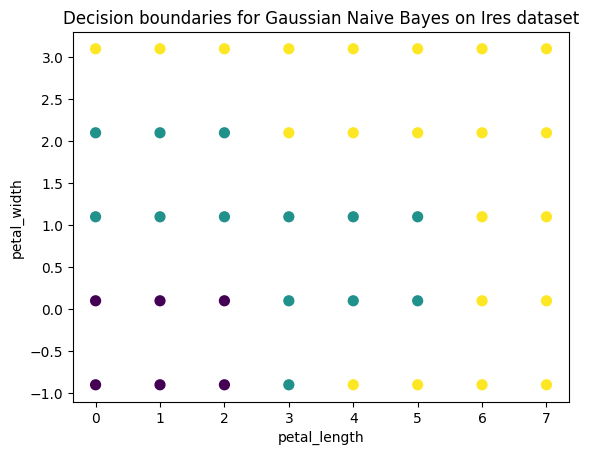

In [25]:
plt.xlabel(ires.columns[2])
plt.ylabel(ires.columns[3])
plt.title("Decision boundaries for Gaussian Naive Bayes on Ires dataset")
plt.scatter(xx.ravel(), yy.ravel(),  c=y_pred.ravel(), s=50)
plt.show()